In [344]:
import tensorflow as tf
import numpy as np 
import pandas as pd
import os
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

### Loading data

In [345]:
# Assuming 'monks1_train_path' is the path to your data file
monks1_train_path = os.getcwd() + '/../../data/monks/monks-1.train'

# Specify the column names or let pandas infer them
column_names = ['target', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'id']

# Load the data into a pandas DataFrame
df = pd.read_csv(monks1_train_path, names=column_names, delimiter=' ')

# Display the loaded data
df

,target,col1,col2,col3,col4,col5,col6,id
NaN,1,1,1,1,1,3,1,data_5
NaN,1,1,1,1,1,3,2,data_6
NaN,1,1,1,1,3,2,1,data_19
NaN,1,1,1,1,3,3,2,data_22
NaN,1,1,1,2,1,2,1,data_27
...,...,...,...,...,...,...,...,...
NaN,1,3,3,2,1,4,2,data_416
NaN,1,3,3,2,3,1,2,data_426
NaN,1,3,3,2,3,2,2,data_428
NaN,1,3,3,2,3,3,2,data_430


In [346]:
y  = df['target'].values.astype(float)
id = df['id'].values.astype(str)

y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.])

In [347]:
# Assuming your DataFrame has features and labels columns
# Replace 'features' and 'labels' with your actual column names

df = df.drop('target', axis=1)
df = df.drop('id', axis=1)
X_one_hot = pd.get_dummies(df, prefix='', prefix_sep='').values.astype(float)

# Substract 1 to match indexing
X_one_hot.shape


(124, 6)

Epoch 1/30
3/3 [==============================] - 0s 22ms/step - loss: 1.0993 - accuracy: 0.4301 - val_loss: 0.6496 - val_accuracy: 0.7097
Epoch 2/30
3/3 [==============================] - 0s 4ms/step - loss: 1.0851 - accuracy: 0.4301 - val_loss: 0.6400 - val_accuracy: 0.7097
Epoch 3/30
3/3 [==============================] - 0s 4ms/step - loss: 1.0690 - accuracy: 0.4301 - val_loss: 0.6309 - val_accuracy: 0.7097
Epoch 4/30
3/3 [==============================] - 0s 4ms/step - loss: 1.0540 - accuracy: 0.4301 - val_loss: 0.6221 - val_accuracy: 0.7097
Epoch 5/30
3/3 [==============================] - 0s 4ms/step - loss: 1.0395 - accuracy: 0.4301 - val_loss: 0.6137 - val_accuracy: 0.7097
Epoch 6/30
3/3 [==============================] - 0s 5ms/step - loss: 1.0251 - accuracy: 0.4301 - val_loss: 0.6055 - val_accuracy: 0.7097
Epoch 7/30
3/3 [==============================] - 0s 4ms/step - loss: 1.0103 - accuracy: 0.4301 - val_loss: 0.5972 - val_accuracy: 0.7097
Epoch 8/30
3/3 [=================

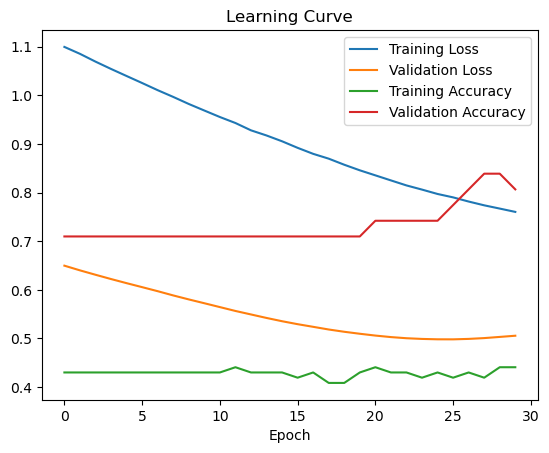

In [348]:
# Define a simple neural network with Keras
model = Sequential()
model.add(Dense(units=4, activation='relu', input_shape=X_one_hot.shape[1:]))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


# Train the model and obtain the training history
#history = model.fit(X, y, epochs=100, batch_size=33, validation_split=0.2)
history = model.fit(
    X_one_hot,
    y,
    epochs=30,
    batch_size=33,
    validation_split=0.25
)

# Plot the learning curve
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.legend()